In [ ]:
pip install yfinance matplotlib pandas


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


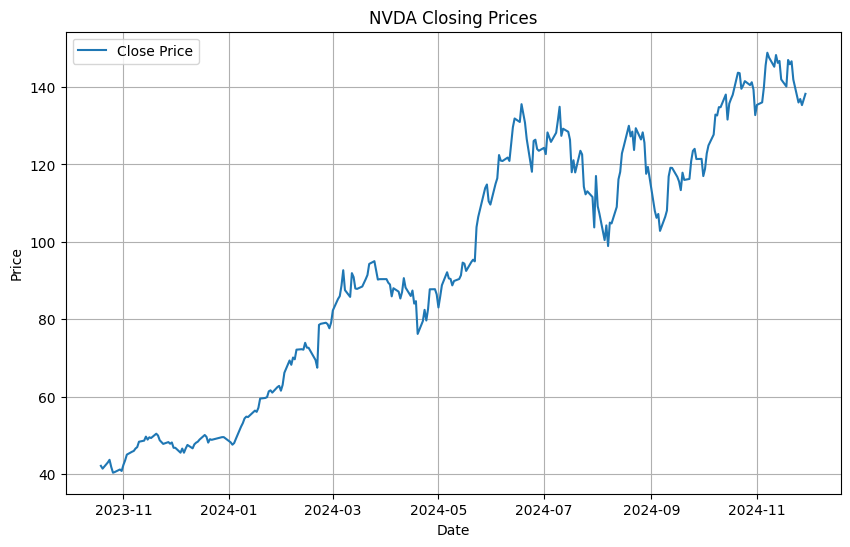

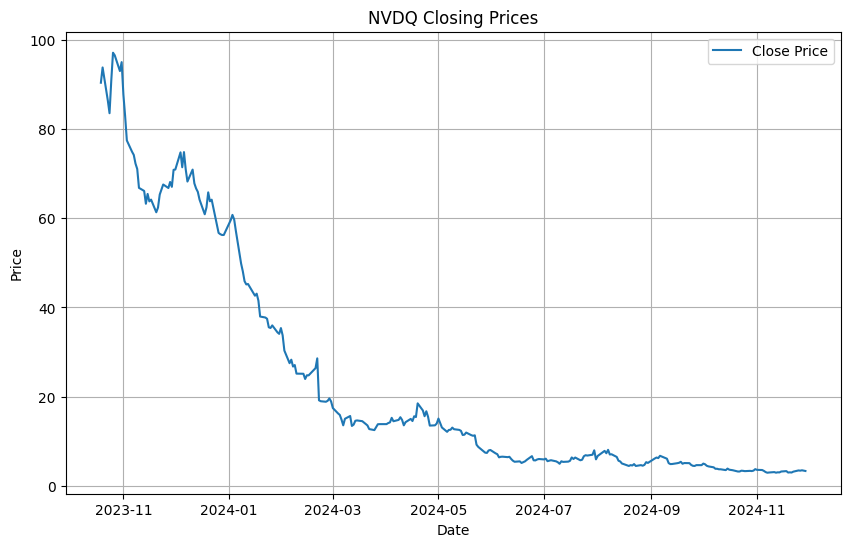

Correlation between NVDA and NVDQ prices:
Price           Close         
Ticker           NVDA     NVDQ
Price Ticker                  
Close NVDA    1.00000 -0.88437
      NVDQ   -0.88437  1.00000
Data exploration complete. Files saved as nvda_data.csv and nvdq_data.csv.


In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Download Historical Data
def download_data(ticker, start_date, end_date):
    data = yf.download(ticker, start=start_date, end=end_date)
    data['Ticker'] = ticker  # Add a column to identify the stock
    return data

# Define the tickers and date range
tickers = ['NVDA', 'NVDQ']
start_date = '2023-10-19'  # Start date based on NVDQ's availability
end_date = '2024-12-01'    # Up to the current date

# Download data for each ticker
nvda_data = download_data('NVDA', start_date, end_date)
nvdq_data = download_data('NVDQ', start_date, end_date)

# Step 2: Data Exploration
def plot_stock_data(data, title):
    plt.figure(figsize=(10, 6))
    plt.plot(data['Close'], label='Close Price')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid()
    plt.show()

# Plot price trends
plot_stock_data(nvda_data, "NVDA Closing Prices")
plot_stock_data(nvdq_data, "NVDQ Closing Prices")

# Step 3: Feature Engineering
def calculate_features(data):
    data['5-Day MA'] = data['Close'].rolling(window=5).mean()  # 5-day moving average
    data['10-Day MA'] = data['Close'].rolling(window=10).mean()  # 10-day moving average
    data['Daily Return (%)'] = data['Close'].pct_change() * 100  # Daily return percentage
    return data

# Add features to the datasets
nvda_data = calculate_features(nvda_data)
nvdq_data = calculate_features(nvdq_data)

# Step 4: Correlation Analysis
merged_data = pd.merge(
    nvda_data[['Close']],
    nvdq_data[['Close']],
    left_index=True,
    right_index=True,
    suffixes=('_NVDA', '_NVDQ')
)
correlation = merged_data.corr()
print("Correlation between NVDA and NVDQ prices:")
print(correlation)

# Step 5: Save Cleaned Data for Future Use
nvda_data.to_csv('nvda_data.csv')
nvdq_data.to_csv('nvdq_data.csv')

print("Data exploration complete. Files saved as nvda_data.csv and nvdq_data.csv.")


Prepare Target This step computes the target values based on the next 5 days of data:

In [ ]:
def generate_targets(data):
    data['Target_Max'] = data['High'].rolling(window=5).max().shift(-4)
    data['Target_Min'] = data['Low'].rolling(window=5).min().shift(-4)
    data['Target_Avg'] = data['Close'].rolling(window=5).mean().shift(-4)
    return data

# Generate targets for NVDA
nvda_data = generate_targets(nvda_data)
nvda_data.dropna(inplace=True)  # Drop rows with NaN due to shifting


Feature Engineering
Add technical indicators and other features:

In [ ]:
def calculate_features(data):
    data['5-Day MA'] = data['Close'].rolling(window=5).mean()
    data['10-Day MA'] = data['Close'].rolling(window=10).mean()
    data['Daily Return (%)'] = data['Close'].pct_change() * 100
    data['Volatility'] = (data['High'] - data['Low']) / data['Low'] * 100
    data['Day_Of_Week'] = data.index.dayofweek  # Monday = 0, Sunday = 6
    return data

# Calculate features for NVDA
nvda_data = calculate_features(nvda_data)
nvda_data.dropna(inplace=True)


Train-Test Split
Split the data into training and testing sets:

In [ ]:
# Split into training and testing datasets
train_data = nvda_data.loc[:'2024-06-30']
test_data = nvda_data.loc['2024-07-01':]

# Define feature columns
features = ['Close', 'Volume', '5-Day MA', '10-Day MA', 'Daily Return (%)', 'Volatility', 'Day_Of_Week']

# Training and testing data
X_train = train_data[features]
X_test = test_data[features]

y_train_max = train_data['Target_Max']
y_train_min = train_data['Target_Min']
y_train_avg = train_data['Target_Avg']

y_test_max = test_data['Target_Max']
y_test_min = test_data['Target_Min']
y_test_avg = test_data['Target_Avg']


Train Models
Train separate regression models for each target:

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Train model for Max Price Prediction
model_max = RandomForestRegressor(n_estimators=100, random_state=42)
model_max.fit(X_train, y_train_max)

# Train model for Min Price Prediction
model_min = RandomForestRegressor(n_estimators=100, random_state=42)
model_min.fit(X_train, y_train_min)

# Train model for Avg Closing Price Prediction
model_avg = RandomForestRegressor(n_estimators=100, random_state=42)
model_avg.fit(X_train, y_train_avg)


ValueError: Found array with 0 sample(s) (shape=(0, 7)) while a minimum of 1 is required by RandomForestRegressor.

In [ ]:
pip install yfinance pandas scikit-learn matplotlib


In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import joblib
import matplotlib.pyplot as plt

# Step 1: Download Historical Data
def download_data(ticker, start_date, end_date):
    print(f"Downloading data for {ticker}...")
    data = yf.download(ticker, start=start_date, end=end_date)
    data['Ticker'] = ticker
    print(f"Downloaded {data.shape[0]} rows for {ticker}.")
    return data

# Download NVDA data
start_date = '2023-10-19'
end_date = '2024-12-01'
nvda_data = download_data('NVDA', start_date, end_date)

# Step 2: Feature Engineering
def calculate_features(data):
    print("Calculating features...")
    data['5-Day MA'] = data['Close'].rolling(window=5).mean()
    data['10-Day MA'] = data['Close'].rolling(window=10).mean()
    data['Daily Return (%)'] = data['Close'].pct_change() * 100
    data['Volatility'] = (data['High'] - data['Low']) / data['Low'] * 100
    data['Day_Of_Week'] = data.index.dayofweek  # Monday = 0, Sunday = 6
    print("Features calculated.")
    return data

nvda_data = calculate_features(nvda_data)

# Step 3: Generate Targets
def generate_targets(data):
    print("Generating target columns...")
    data['Target_Max'] = data['High'].rolling(window=5).max().shift(-4)
    data['Target_Min'] = data['Low'].rolling(window=5).min().shift(-4)
    data['Target_Avg'] = data['Close'].rolling(window=5).mean().shift(-4)
    print("Target columns generated.")
    print(data[['Target_Max', 'Target_Min', 'Target_Avg']].head())  # Debugging step
    return data

nvda_data = generate_targets(nvda_data)

# Step 4: Flatten Multi-Index Columns
print("Flattening multi-index columns...")
nvda_data.columns = ['_'.join(col).strip() if isinstance(col, tuple) else col for col in nvda_data.columns]
print("Flattened Columns:", nvda_data.columns)

# Step 5: Drop Rows with NaN in Targets
print("Dropping rows with NaN in target columns...")
print("Rows before dropna:", nvda_data.shape[0])
nvda_data.dropna(subset=['Target_Max', 'Target_Min', 'Target_Avg'], inplace=True)
print("Rows after dropna:", nvda_data.shape[0])

# Verify the data
print("Dataset Shape After Processing:", nvda_data.shape)
print(nvda_data.head())

# Step 6: Train-Test Split
train_data = nvda_data.loc[:'2024-06-30']
test_data = nvda_data.loc['2024-07-01':]

features = ['Close', 'Volume', '5-Day MA', '10-Day MA', 'Daily Return (%)', 'Volatility', 'Day_Of_Week']

X_train = train_data[features]
X_test = test_data[features]

y_train_max = train_data['Target_Max']
y_train_min = train_data['Target_Min']
y_train_avg = train_data['Target_Avg']

y_test_max = test_data['Target_Max']
y_test_min = test_data['Target_Min']
y_test_avg = test_data['Target_Avg']

# Verify train-test split
print("Training Data Shape:", X_train.shape)
print("Testing Data Shape:", X_test.shape)

# Step 7: Train Models
print("Training models...")
model_max = RandomForestRegressor(n_estimators=100, random_state=42)
model_min = RandomForestRegressor(n_estimators=100, random_state=42)
model_avg = RandomForestRegressor(n_estimators=100, random_state=42)

model_max.fit(X_train, y_train_max)
model_min.fit(X_train, y_train_min)
model_avg.fit(X_train, y_train_avg)
print("Models trained successfully!")

# Step 8: Evaluate Models
y_pred_max = model_max.predict(X_test)
y_pred_min = model_min.predict(X_test)
y_pred_avg = model_avg.predict(X_test)

print("Max Price Prediction - MSE:", mean_squared_error(y_test_max, y_pred_max))
print("Min Price Prediction - MSE:", mean_squared_error(y_test_min, y_pred_min))
print("Avg Price Prediction - MSE:", mean_squared_error(y_test_avg, y_pred_avg))

# Step 9: Save Models
print("Saving models...")
joblib.dump(model_max, 'max_price_model.pkl')
joblib.dump(model_min, 'min_price_model.pkl')
joblib.dump(model_avg, 'avg_price_model.pkl')
print("Models saved successfully!")

# Optional: Plot Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.plot(y_test_max.values, label='Actual Max Prices', alpha=0.7)
plt.plot(y_pred_max, label='Predicted Max Prices', alpha=0.7)
plt.title("Max Price Prediction")
plt.legend()
plt.show()


[*********************100%***********************]  1 of 1 completed

Downloaded 281 rows for NVDA.
Calculating features...
Features calculated.
Generating target columns...
Target columns generated.
Price      Target_Max Target_Min Target_Avg
Ticker                                     
Date                                       
2023-10-19  43.696999  40.945000  42.381000
2023-10-20  43.696999  39.880001  42.025999
2023-10-23  43.696999  39.880001  41.848599
2023-10-24  43.696999  39.880001  41.485799
2023-10-25  43.650002  39.230000  40.909200
Flattening multi-index columns...
Flattened Columns: Index(['Adj Close_NVDA', 'Close_NVDA', 'High_NVDA', 'Low_NVDA', 'Open_NVDA',
       'Volume_NVDA', 'Ticker_', '5-Day MA_', '10-Day MA_',
       'Daily Return (%)_', 'Volatility_', 'Day_Of_Week_', 'Target_Max_',
       'Target_Min_', 'Target_Avg_'],
      dtype='object')
Dropping rows with NaN in target columns...
Rows before dropna: 281


KeyError: ['Target_Max', 'Target_Min', 'Target_Avg']

In [ ]:
pip install yfinance pandas scikit-learn matplotlib



*********************100%***********************]  1 of 1 completed

Downloaded 281 rows for NVDA.
Calculating features...
Features calculated.
Generating target columns...
Target columns generated.
Price      Target_Max Target_Min Target_Avg
Ticker                                     
Date                                       
2023-10-19  43.696999  40.945000  42.381000
2023-10-20  43.696999  39.880001  42.025999
2023-10-23  43.696999  39.880001  41.848599
2023-10-24  43.696999  39.880001  41.485799
2023-10-25  43.650002  39.230000  40.909200
Flattening multi-index columns...
Flattened Columns: Index(['Adj Close_NVDA', 'Close_NVDA', 'High_NVDA', 'Low_NVDA', 'Open_NVDA',
       'Volume_NVDA', 'Ticker_', '5-Day MA_', '10-Day MA_',
       'Daily Return (%)_', 'Volatility_', 'Day_Of_Week_', 'Target_Max_',
       'Target_Min_', 'Target_Avg_'],
      dtype='object')
Dropping rows with NaN in target columns...
Rows before dropna: 281
Rows after dropna: 277
Dataset Shape After Processing: (277, 15)
            Adj Close_NVDA  Close_NVDA  High_NVDA   Low_NVDA 

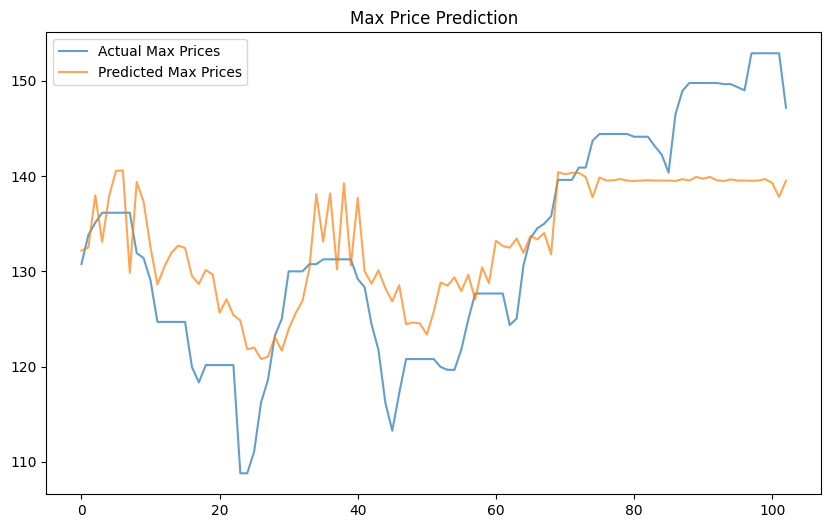

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import joblib
import matplotlib.pyplot as plt

# Step 1: Download Historical Data
def download_data(ticker, start_date, end_date):
    print(f"Downloading data for {ticker}...")
    data = yf.download(ticker, start=start_date, end=end_date)
    data['Ticker'] = ticker
    print(f"Downloaded {data.shape[0]} rows for {ticker}.")
    return data

# Download NVDA data
start_date = '2023-10-19'
end_date = '2024-12-01'
nvda_data = download_data('NVDA', start_date, end_date)

# Step 2: Feature Engineering
def calculate_features(data):
    print("Calculating features...")
    data['5-Day MA'] = data['Close'].rolling(window=5).mean()
    data['10-Day MA'] = data['Close'].rolling(window=10).mean()
    data['Daily Return (%)'] = data['Close'].pct_change() * 100
    data['Volatility'] = (data['High'] - data['Low']) / data['Low'] * 100
    data['Day_Of_Week'] = data.index.dayofweek  # Monday = 0, Sunday = 6
    print("Features calculated.")
    return data

nvda_data = calculate_features(nvda_data)

# Step 3: Generate Targets
def generate_targets(data):
    print("Generating target columns...")
    data['Target_Max'] = data['High'].rolling(window=5).max().shift(-4)
    data['Target_Min'] = data['Low'].rolling(window=5).min().shift(-4)
    data['Target_Avg'] = data['Close'].rolling(window=5).mean().shift(-4)
    print("Target columns generated.")
    print(data[['Target_Max', 'Target_Min', 'Target_Avg']].head())  # Debugging step
    return data

nvda_data = generate_targets(nvda_data)

# Step 4: Flatten Multi-Index Columns
print("Flattening multi-index columns...")
nvda_data.columns = ['_'.join(col).strip() if isinstance(col, tuple) else col for col in nvda_data.columns]
print("Flattened Columns:", nvda_data.columns)

# Step 5: Drop Rows with NaN in Targets
print("Dropping rows with NaN in target columns...")
print("Rows before dropna:", nvda_data.shape[0])
nvda_data.dropna(subset=['Target_Max_', 'Target_Min_', 'Target_Avg_'], inplace=True)
print("Rows after dropna:", nvda_data.shape[0])


# Verirfy the data
print("Dataset Shape After Processing:", nvda_data.shape)
print(nvda_data.head())

# Step 6: Train-Test Split
# Define train and test splits by date
train_data = nvda_data.loc[:'2024-06-30']
test_data = nvda_data.loc['2024-07-01':]

# Corrected feature column names
features = ['Close_NVDA', 'Volume_NVDA', '5-Day MA_', '10-Day MA_',
            'Daily Return (%)_', 'Volatility_', 'Day_Of_Week_']

# Prepare features for training and testing
X_train = train_data[features]
X_test = test_data[features]

# Corrected target column names
y_train_max = train_data['Target_Max_']
y_train_min = train_data['Target_Min_']
y_train_avg = train_data['Target_Avg_']

y_test_max = test_data['Target_Max_']
y_test_min = test_data['Target_Min_']
y_test_avg = test_data['Target_Avg_']

# Verify shapes to ensure splits are non-empty
print("Training Features Shape:", X_train.shape)
print("Testing Features Shape:", X_test.shape)
print("Training Target (Max) Shape:", y_train_max.shape)
print("Testing Target (Max) Shape:", y_test_max.shape)



# Step 7: Train Models
print("Training models...")

# Initialize Random Forest models for each target
model_max = RandomForestRegressor(n_estimators=100, random_state=42)
model_min = RandomForestRegressor(n_estimators=100, random_state=42)
model_avg = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the models
model_max.fit(X_train, y_train_max)
model_min.fit(X_train, y_train_min)
model_avg.fit(X_train, y_train_avg)

print("Models trained successfully!")




# Step 8: Evaluate Models
y_pred_max = model_max.predict(X_test)
y_pred_min = model_min.predict(X_test)
y_pred_avg = model_avg.predict(X_test)

print("Max Price Prediction - MSE:", mean_squared_error(y_test_max, y_pred_max))
print("Min Price Prediction - MSE:", mean_squared_error(y_test_min, y_pred_min))
print("Avg Price Prediction - MSE:", mean_squared_error(y_test_avg, y_pred_avg))

# Step 9: Save Models
print("Saving models...")
joblib.dump(model_max, 'max_price_model.pkl')
joblib.dump(model_min, 'min_price_model.pkl')
joblib.dump(model_avg, 'avg_price_model.pkl')
print("Models saved successfully!")

# Optional: Plot Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.plot(y_test_max.values, label='Actual Max Prices', alpha=0.7)
plt.plot(y_pred_max, label='Predicted Max Prices', alpha=0.7)
plt.title("Max Price Prediction")
plt.legend()
plt.show()


In [2]:
import os
print("Files in current directory:", os.listdir())


Files in current directory: ['min_price_model.pkl', '.DS_Store', 'frontend', 'requirements.txt', 'insp', 'max_price_model.pkl', 'nvda_data.csv', 'nvdq_data.csv', 'README.md', 'avg_price_model.pkl', '.ipynb_checkpoints', 'yfinance_load.ipynb', '.git']


evaluate Repeat this process for Min Price and Avg Price.

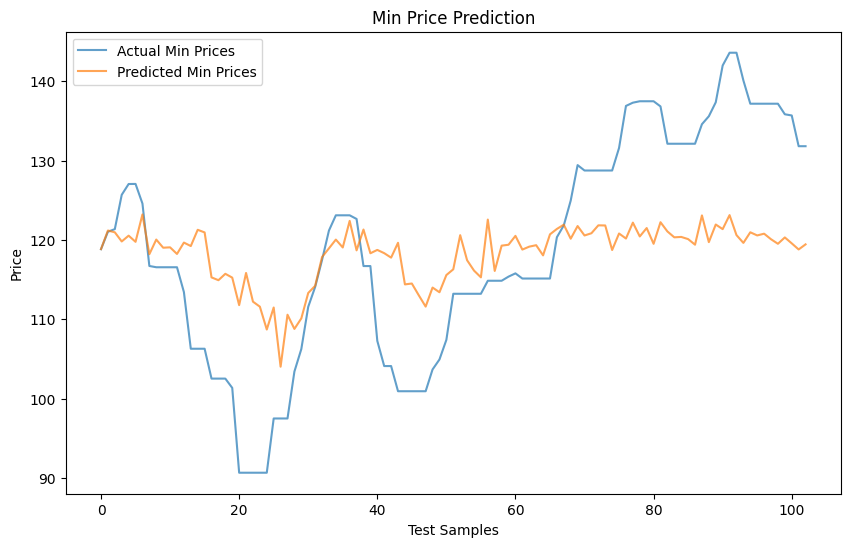

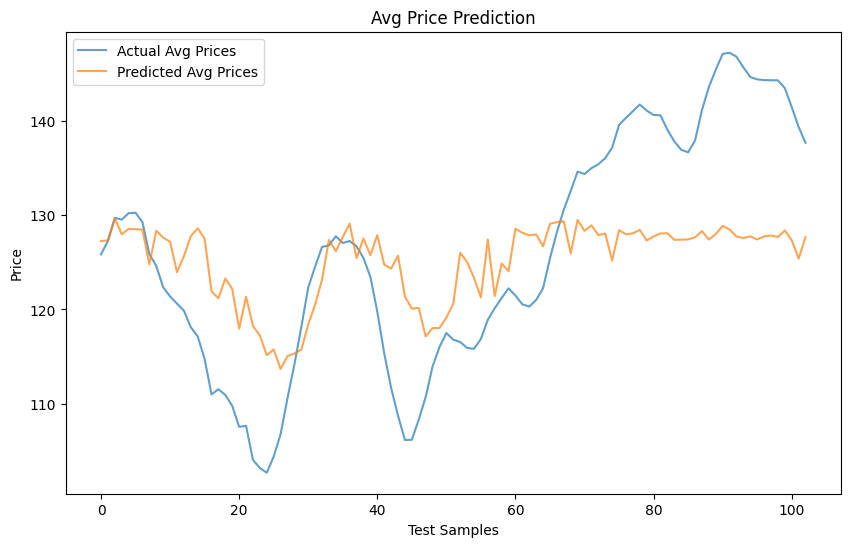

In [ ]:
# Plot for Min Price Prediction
plt.figure(figsize=(10, 6))
plt.plot(y_test_min.values, label='Actual Min Prices', alpha=0.7)
plt.plot(y_pred_min, label='Predicted Min Prices', alpha=0.7)
plt.title("Min Price Prediction")
plt.xlabel("Test Samples")
plt.ylabel("Price")
plt.legend()
plt.show()

# Plot for Avg Price Prediction
plt.figure(figsize=(10, 6))
plt.plot(y_test_avg.values, label='Actual Avg Prices', alpha=0.7)
plt.plot(y_pred_avg, label='Predicted Avg Prices', alpha=0.7)
plt.title("Avg Price Prediction")
plt.xlabel("Test Samples")
plt.ylabel("Price")
plt.legend()
plt.show()
